## Parallelopiped classifier
- **The parallelepiped classifier is a simple machine learning algorithm used for multi-class classification tasks.** 
- **It works by dividing the feature space into several parallelepiped-shaped regions, one for each class.**
- **The classifier then assigns a new data point to the class whose parallelepiped region it falls within.**
- **The number and shape of the parallelepipeds are determined by the user-defined parameter, which specifies the number of intervals along each dimension.**
- **The classifier is computationally efficient and easy to implement, but it has limitations, such as poor performance when classes are not linearly separable, and it does not handle overlapping regions well.**

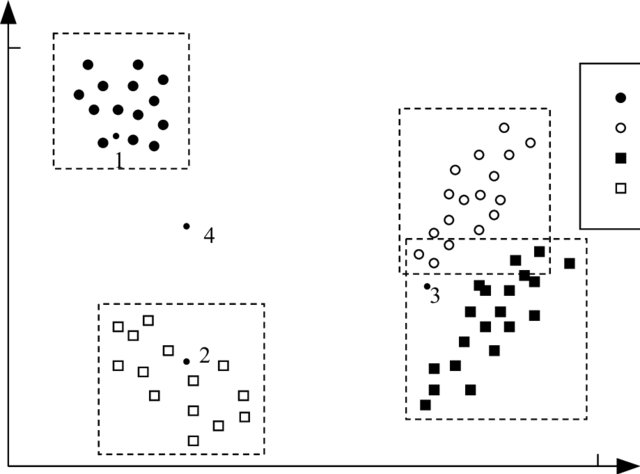

## Dataset
- **Here we are using Breast Cancer dataset for this parallelopiped classifier because it is linearly separable which leads to better performance of model and more importantly it only consists of two classes.**
- **The Breast Cancer Wisconsin (Diagnostic) dataset is a classic binary classification dataset used to predict whether a breast tumor is benign or malignant.**
- **It consists of 569 samples, each containing measurements of 30 features extracted from digitized images of fine needle aspirate (FNA) of breast mass.**
- **The features are computed from a digitized image of a FNA of a breast mass, and they describe characteristics of the cell nuclei present in the image, such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension.**
- **Each sample in the dataset is labeled with a target variable indicating whether the tumor is benign (label 0) or malignant (label 1). The dataset has 357 benign samples and 212 malignant samples.**
- **The dataset is often used as a benchmark dataset for evaluating the performance of binary classification algorithms.**

Import Breast Cancer datast from scikit-learn module

In [4]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

The following code visualises the dataset for better interpretability

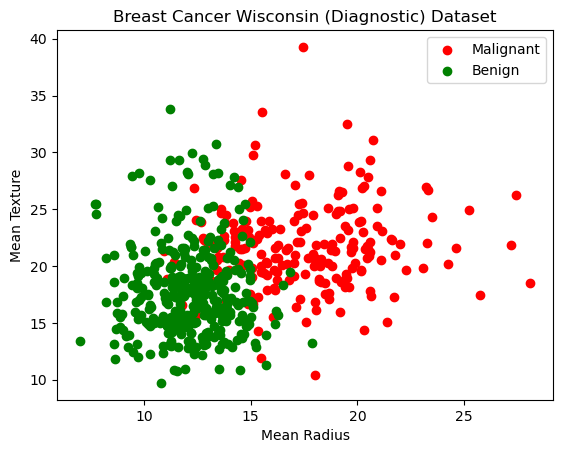

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target variable to the DataFrame
df['target'] = breast_cancer.target

# Separate the malignant and benign samples
malignant = df[df['target'] == 0]
benign = df[df['target'] == 1]

# Plot the data
fig, ax = plt.subplots()
ax.scatter(malignant['mean radius'], malignant['mean texture'], color='red', label='Malignant')
ax.scatter(benign['mean radius'], benign['mean texture'], color='green', label='Benign')
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')
ax.set_title('Breast Cancer Wisconsin (Diagnostic) Dataset')
ax.legend()
plt.show()

- In this implementation, the number of intervals is determined by the `num_intervals` parameter, and the minimum and maximum values of each feature for each class are computed in the `fit()` method using the training data. 
- The `predict()` method then classifies new data by comparing its features to the minimum and maximum values for each class, and assigning it to the class whose box it falls into. 
- This implementation is designed to work with a two-class problem, as indicated by the shape of the `feature_min` and `feature_max` arrays.

In [6]:
import numpy as np

class ParallelepipedClassifier:
    def __init__(self, num_intervals=3):
        self.num_intervals = num_intervals
        self.feature_min = None
        self.feature_max = None
    
    def fit(self, X, y):
        # Compute the minimum and maximum values of each feature for each class and stores these values
        self.feature_min = np.zeros((2, self.num_intervals))
        self.feature_max = np.zeros((2, self.num_intervals))
        for i in range(2):
            for j in range(self.num_intervals):
                self.feature_min[i, j] = np.min(X[y == i, i]) + j * (np.max(X[:, i]) - np.min(X[:, i])) / self.num_intervals
                self.feature_max[i, j] = np.min(X[y == i, i]) + (j + 1) * (np.max(X[:, i]) - np.min(X[:, i])) / self.num_intervals

    def predict(self, X):
        # Classify the test set using the stored values of feature interval during the training phase
        # If any sample lies in the interval then it is classified as belonging to that class
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            for j in range(2):
                if (X[i, 0] >= self.feature_min[j, 0] and X[i, 0] <= self.feature_max[j, 0] and
                    X[i, 1] >= self.feature_min[j, 1] and X[i, 1] <= self.feature_max[j, 1]):
                    y_pred[i] = j
                    break
        return y_pred

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = ParallelepipedClassifier(num_intervals=3)
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.38


The following plot shows the obtained parallelopipes for two of the features

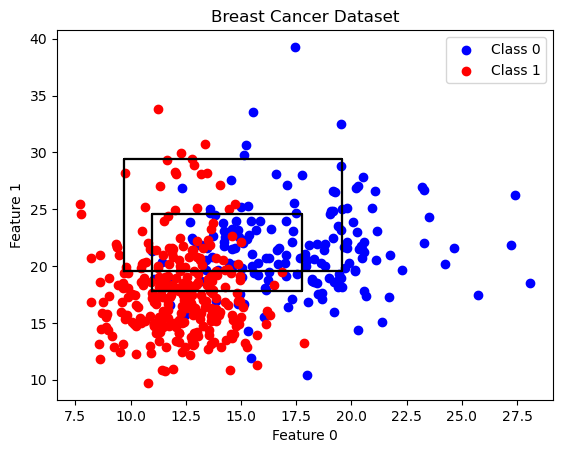

In [19]:
import matplotlib.pyplot as plt

# Plot the training set with different colors for each class
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1')

# Plot the intervals for each class
for i in range(2):
    for j in range(clf.num_intervals):
        # Compute the coordinates of the corners of the parallelepiped
        x_min = clf.feature_min[i, 0]
        x_max = clf.feature_max[i, 0]
        y_min = clf.feature_min[i, 1]
        y_max = clf.feature_max[i, 1]
        x_coords = [x_min, x_max, x_max, x_min, x_min]
        y_coords = [y_min, y_min, y_max, y_max, y_min]
        
        # Plot the parallelepiped
        plt.plot(x_coords, y_coords, color='black')
        
plt.title('Breast Cancer Dataset')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()
